# Tarea 2 algoritmos Genéticos: 
Por: Roberto Cholaky y Ricardo Asenjo

# IMPORTANTE:
Si falta una de las lineas de algún gráfico es porque el modelo lo encontró en la inicializaición

In [44]:
import Ga_class
import numpy as np
import random

import matplotlib.pyplot as plt
import pandas as pd

def plot_fit_per_generation(best_fit, mean_fit, worst_fit):
    plt.figure(figsize=(15,8))
    plt.plot(mean_fit, label='mean fit of generation')
    plt.plot(best_fit_per_generation, label='best generation')
    plt.plot(worst_fit, label='worst fit of generation')
    plt.legend()
    plt.title('Fit per generation')
    plt.xlabel('Generation')
    plt.ylabel('fit value')
    plt.grid()
    plt.show()
    

def plot_best_fit_3_times(best_fit_1, best_fit_2, best_fit_3):
    plt.figure(figsize=(15,8))
    plt.plot(best_fit_1, label='best generation 1')
    plt.plot(best_fit_2, label='best generation 2')
    plt.plot(best_fit_3, label='best generation 3')
    plt.legend()
    plt.title('Fit per generation')
    plt.xlabel('Generation')
    plt.ylabel('fit value')
    plt.grid()
    plt.show()

def run_3_times(GA):
    _,_,_, best_fit_1 = GA.run(verbose=False)
    _,_,_, best_fit_2 = GA.run(verbose=False)
    _,_,_, best_fit_3 = GA.run(verbose=False)
    plot_best_fit_3_times(best_fit_1, best_fit_2, best_fit_3)


# Primer Caso:  Encontrar Palabras:
Para este ejemplo se genera una palabra de 3 letras, donde lo que se busca es encontrar la palabra "cat". Para esto se utilizará la clase Ga_class que tiene como objetivo entregar una interfaz simple para que el usuario pueda generar los resultados esperados.

In [45]:

def individual_factory(individual_per_generation, length):
    individual_list = list()
    abc = ['a', 'b', 'c' , 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'x', 'w', 'y', 'z']
    for individual in range(individual_per_generation):
        an_individual = random.choices(abc, k=length)
        individual_list.append(an_individual)
    individuals = np.vstack(individual_list)
    return individuals
        
    
def fit(individuals, word):
    list_of_ind_fitness = list()
    for an_individual in individuals:
        different_letter_count = 0
        for letter_index in range(len(word)):
            is_same = word[letter_index]==an_individual[letter_index]
            different_letter_count += 1*is_same
        list_of_ind_fitness.append(different_letter_count)
        fitness = np.vstack(list_of_ind_fitness)   
    return  fitness.reshape((fitness.shape[0],))


In [46]:
abc = ['a', 'b', 'c' , 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'x', 'w', 'y', 'z']
in_word = input("Enter the word you want us to find:")
in_word = in_word.lower()
if in_word == '':
    print('Please choose a non empty word')
else:
    def fit_function(generation):
        return fit(generation, in_word)
    

    genetic_alg = Ga_class.GA(300, 100, len(in_word), 0.3, abc, individual_factory, fit_function, selection='roulette', cross_over='normal', mutation='normal',desired_fitness=len(in_word))


Enter the word you want us to find:teletubi


In [47]:
best_individual, mean_fit_per_generation, worst_fit_per_generation, best_fit_per_generation = genetic_alg.run()

working in generation 0
the best fit is: 2
working in generation 1
the best fit is: 3
working in generation 2
the best fit is: 3
working in generation 3
the best fit is: 4
working in generation 4
the best fit is: 4
working in generation 5
the best fit is: 4
working in generation 6
the best fit is: 4
working in generation 7
the best fit is: 5
working in generation 8
the best fit is: 5
working in generation 9
the best fit is: 5
working in generation 10
the best fit is: 6
working in generation 11
the best fit is: 6
working in generation 12
the best fit is: 6
working in generation 13
the best fit is: 6
working in generation 14
the best fit is: 6
working in generation 15
the best fit is: 6
working in generation 16
the best fit is: 6
working in generation 17
the best fit is: 6
working in generation 18
the best fit is: 6
working in generation 19
the best fit is: 6
working in generation 20
the best fit is: 6
working in generation 21
the best fit is: 6
working in generation 22
the best fit is: 

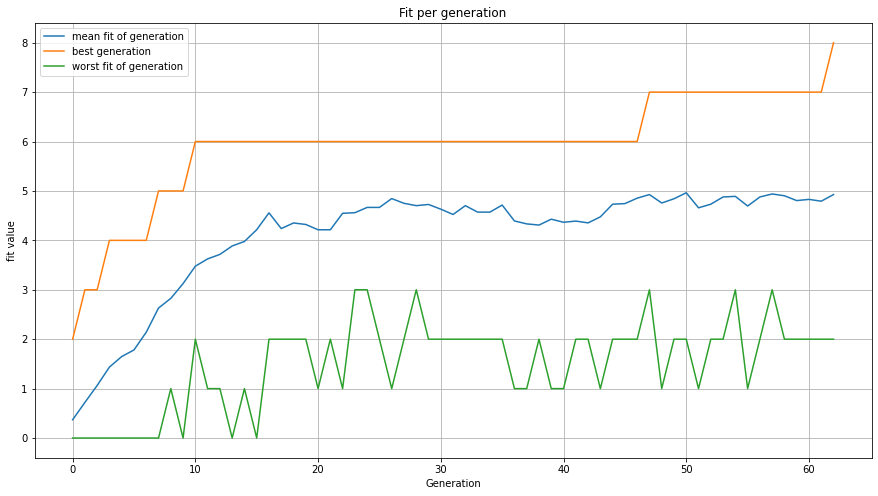

In [48]:
plot_fit_per_generation(best_fit_per_generation, mean_fit_per_generation, worst_fit_per_generation)

In [49]:
print('la palbra encontrada es: ' + str(best_individual))

la palbra encontrada es: ['t' 'e' 'l' 'e' 't' 'u' 'b' 'i']


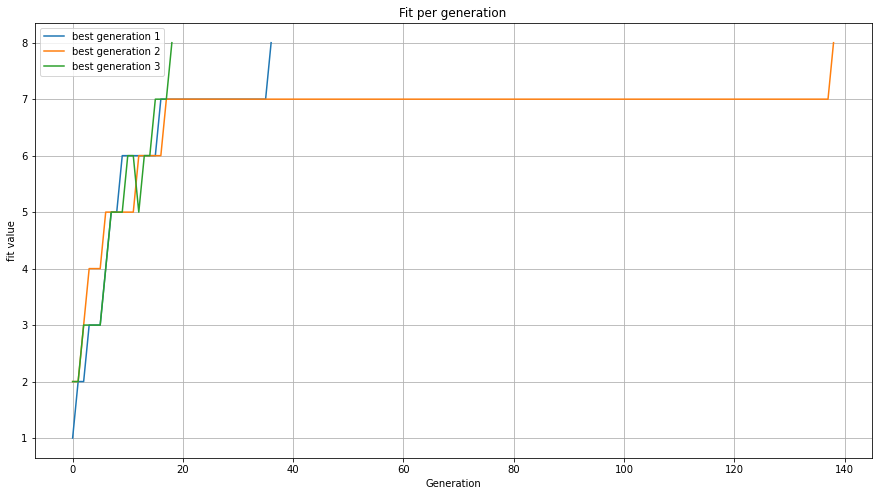

In [50]:
run_3_times(genetic_alg)

# Caso 2: Códificación de bits dado decimales
Para esta parte se nos entrega un número que pone el usuario y el algoritmo genético permite encontrar la escritura en bits de esta, la idea se encuentra en generar un arreglo de 8 bits que tenga elementos aleatorios y reproducir estos hasta encontrar una correcta representación de estos.

In [57]:
def individual_factory(individual_per_generation, length):
    individuals = np.random.randint(0, 2, size=(individual_per_generation, length))
    return individuals
        
    
def fit(individuals, objective_number):
    value = np.asarray([128, 64, 32, 16, 8, 4, 2, 1])
    individuals_decimals = np.sum(individuals*value, axis=-1)
    distance = np.absolute(objective_number-individuals_decimals)+0.5
    return 1/distance

In [58]:
possibilities = [0, 1]
in_number = input("Enter the number you want us to find in binary between 0 and 255: ")
if in_number == '':
    print('Please choose a non empty word')
else:
    in_number = int(in_number)
    def fit_function(generation):
        return fit(generation, in_number)

    genetic_alg = Ga_class.GA(200, 30, 8, 0.2, possibilities, individual_factory, fit_function, selection='roulette', cross_over='normal', mutation='normal',desired_fitness=2)

Enter the number you want us to find in binary between 0 and 255: 135


In [59]:
best_individual, mean_fit_per_generation, worst_fit_per_generation, best_fit_per_generation = genetic_alg.run()

working in generation 0
the best fit is: 0.15384615384615385
working in generation 1
the best fit is: 0.4
working in generation 2
the best fit is: 0.6666666666666666
working in generation 3
the best fit is: 2.0


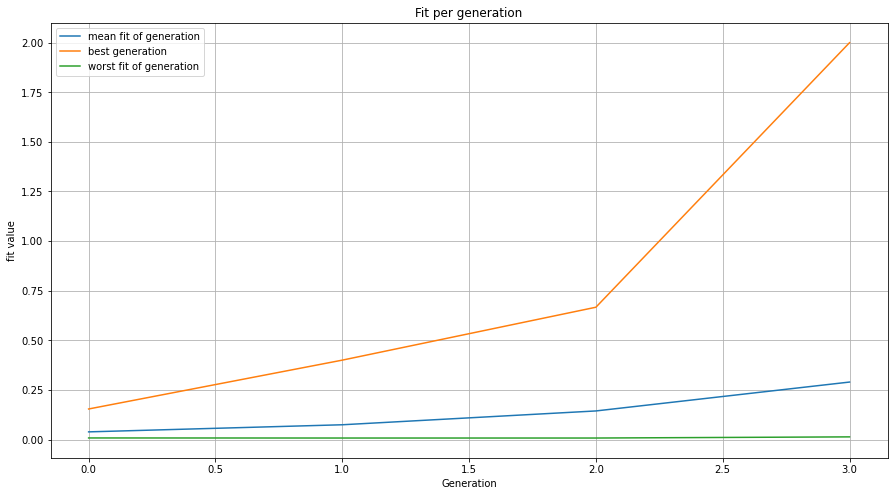

In [60]:
plot_fit_per_generation(best_fit_per_generation, mean_fit_per_generation, worst_fit_per_generation)

In [61]:
best_individual

array([1, 0, 0, 0, 0, 1, 1, 1])

In [62]:
num = np.sum(best_individual*np.asarray([128, 64, 32, 16, 8, 4, 2, 1]))
print('El número encontrado es '+ str(num))

El número encontrado es 135


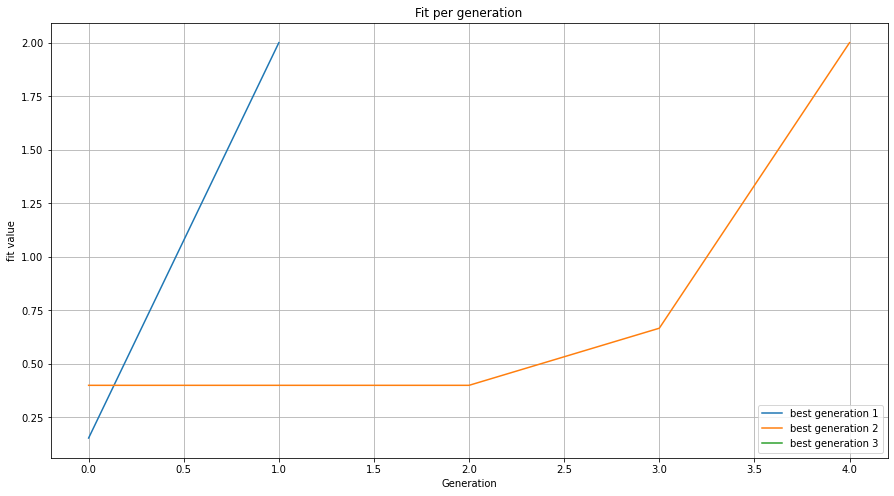

In [63]:
run_3_times(genetic_alg)

# Parte 3: Traveling Salesman Persons:
Este problema trata de la generación de caminos óptimos para un vendedor ambulante que quiere partir en una ciudad y llegar a otra sin pasar por una misma ciudad dos veces si es que no es para terminar su recorrido.

In [24]:
def individual_factory(n_individuals, gen_length):
    individuals = list()
    abc = ['A', 'B', 'C' , 'D', 'E', 'F', 'G', 'H', 'I', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'X', 'W', 'Y', 'Z']
    nodos = abc[:gen_length]
    nodos = np.asarray(nodos)

    for index in range(n_individuals):
        permutation = np.random.permutation(gen_length)
        an_individual = nodos[permutation]
        individuals.append(an_individual)
    individuals = np.vstack(individuals)
    return individuals

def fit(the_individuals, grafo):
    nodo_set= set(grafo.columns)
    the_generation_fitness = list()
    gen_length = len(grafo.columns)
    for an_individual in the_individuals:
        the_fit = 0
        the_unique = set(an_individual)
        if the_unique == nodo_set:
            for the_cities_index in range(gen_length):
                the_cities_overflow = the_cities_index != gen_length-1 
                the_actual_city = an_individual[the_cities_index]
                the_next_city_index = the_cities_overflow*(the_cities_index+1)
                the_next_city = an_individual[the_next_city_index]
                the_fit += grafo.loc[the_actual_city, the_next_city] 
        else:
            the_fit += 500
        the_generation_fitness.append(the_fit)
    the_generation_fitness = np.vstack(the_generation_fitness)
    return   1/the_generation_fitness


In [102]:
nodos = ['A', 'B', 'C', 'D']
grafo = np.array([[100, 12, 14, 17],
                  [12, 100, 15, 18],
                  [14, 15, 100, 29],
                  [17, 18, 29, 100]])
grafo= pd.DataFrame(grafo, nodos, nodos)

In [103]:
def fit_function(generation):
        return fit(generation, grafo)
genetic_alg = Ga_class.GA(100, 2, 4, 0.15, nodos, individual_factory, fit_function, selection='roulette', cross_over='ordered', mutation='swap',desired_fitness=0)

In [104]:
best_individual, mean_fit_per_generation, worst_fit_per_generation, best_fit_per_generation = genetic_alg.run()

working in generation 0
the best fit is: 0.0136986301369863
working in generation 1
the best fit is: 0.0136986301369863
working in generation 2
the best fit is: 0.0136986301369863
working in generation 3
the best fit is: 0.0136986301369863
working in generation 4
the best fit is: 0.0136986301369863
working in generation 5
the best fit is: 0.0136986301369863
working in generation 6
the best fit is: 0.0136986301369863
working in generation 7
the best fit is: 0.015625
working in generation 8
the best fit is: 0.015625
working in generation 9
the best fit is: 0.015625
working in generation 10
the best fit is: 0.015625
working in generation 11
the best fit is: 0.015625
working in generation 12
the best fit is: 0.015625
working in generation 13
the best fit is: 0.015625
working in generation 14
the best fit is: 0.015625
working in generation 15
the best fit is: 0.015625
working in generation 16
the best fit is: 0.015625
working in generation 17
the best fit is: 0.015625
working in generation 

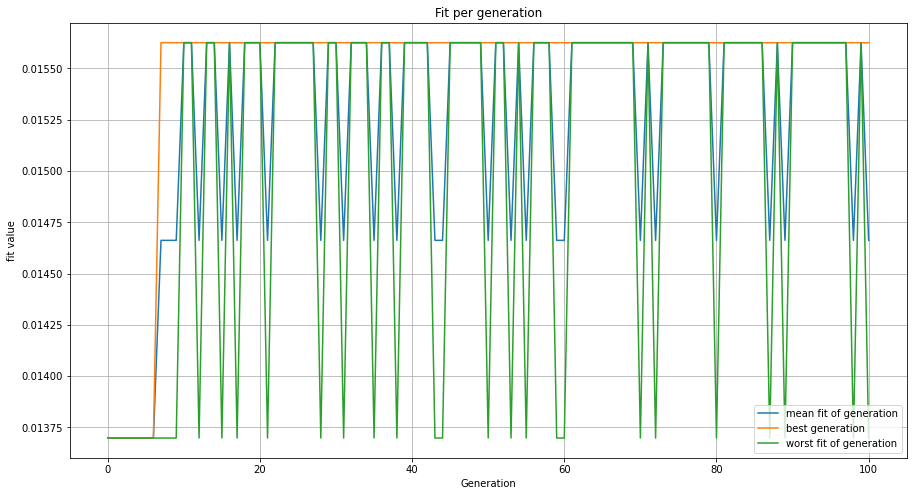

In [105]:
plot_fit_per_generation(best_fit_per_generation, mean_fit_per_generation, worst_fit_per_generation)

In [106]:
theBest = best_individual.reshape((1,4))

óptimo esperado: 64 CBDA 

In [107]:
print('fitness de '+ str(theBest)+ " es " + str(1/fit_function(theBest)))

fitness de [['C' 'A' 'D' 'B']] es [[64.]]


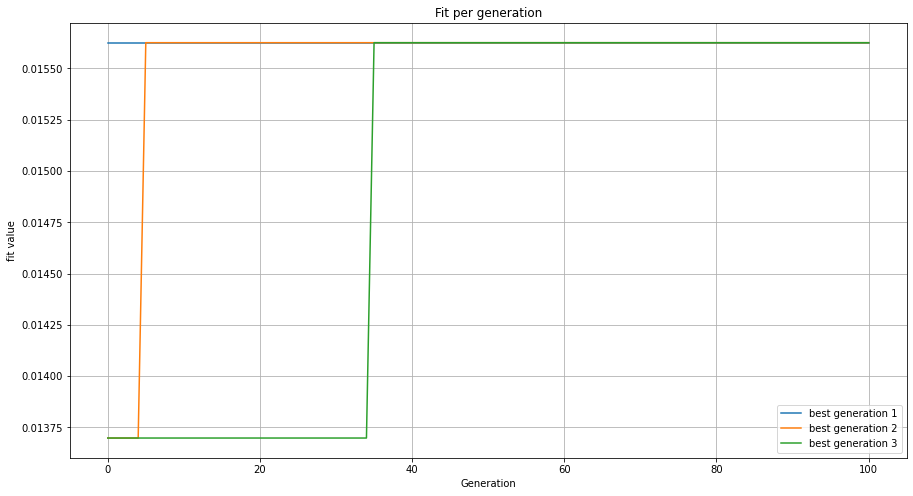

In [110]:
run_3_times(genetic_alg)

# Caso con mayor número de ciudades

In [49]:
nodos = ['A', 'B', 'C', 'D', 'E']
grafo = np.array([[100, 12, 10, 19, 8],
                  [12, 100, 3, 7, 2],
                  [10, 3, 100, 6, 20],
                  [19, 7, 6, 100, 4],
                  [8, 2, 20, 4,  100]])
grafo= pd.DataFrame(grafo, nodos, nodos)
def fit_function(generation):
        return fit(generation, grafo)

ind = individual_factory(10,5)
print(fit_function(ind))


[[0.03030303]
 [0.02941176]
 [0.01886792]
 [0.01724138]
 [0.02631579]
 [0.01724138]
 [0.03030303]
 [0.03030303]
 [0.01886792]
 [0.03030303]]


In [56]:
genetic_alg = Ga_class.GA(100, 2, 5, 0.15, nodos, individual_factory, fit_function, selection='roulette', cross_over='ordered', mutation='swap',desired_fitness=0)

In [57]:
best_individual, mean_fit_per_generation, worst_fit_per_generation, best_fit_per_generation = genetic_alg.run()

working in generation 0
the best fit is: 0.03125
working in generation 1
the best fit is: 0.03125
working in generation 2
the best fit is: 0.03125
working in generation 3
the best fit is: 0.03125
working in generation 4
the best fit is: 0.03125
working in generation 5
the best fit is: 0.03125
working in generation 6
the best fit is: 0.03125
working in generation 7
the best fit is: 0.03125
working in generation 8
the best fit is: 0.03125
working in generation 9
the best fit is: 0.03125
working in generation 10
the best fit is: 0.03125
working in generation 11
the best fit is: 0.03125
working in generation 12
the best fit is: 0.03125
working in generation 13
the best fit is: 0.03125
working in generation 14
the best fit is: 0.03125
working in generation 15
the best fit is: 0.03125
working in generation 16
the best fit is: 0.03125
working in generation 17
the best fit is: 0.03125
working in generation 18
the best fit is: 0.03125
working in generation 19
the best fit is: 0.03125
working in

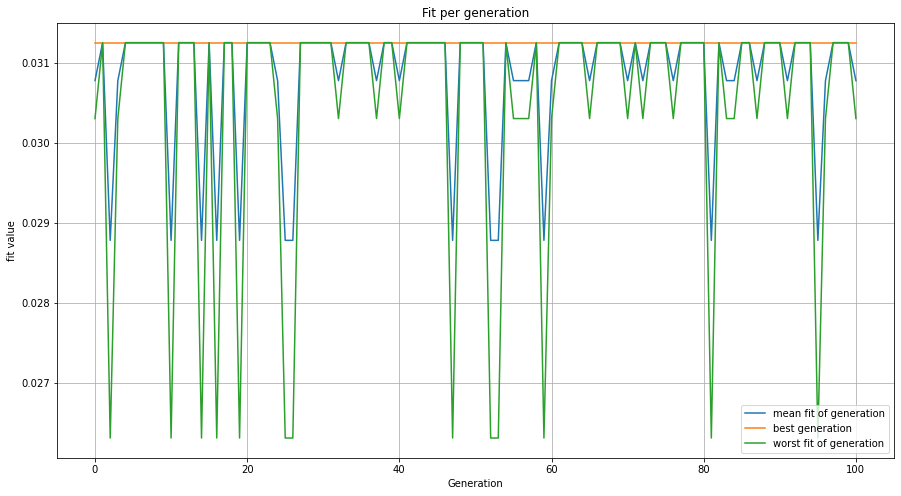

In [58]:
plot_fit_per_generation(best_fit_per_generation, mean_fit_per_generation, worst_fit_per_generation)

In [59]:
theBest = best_individual.reshape((1,5))

óptimo esperado: 32 EACBD

In [60]:
print('fitness '+ str(theBest) + str(1/fit_function(theBest)))

fitness [['A' 'C' 'B' 'D' 'E']][[32.]]


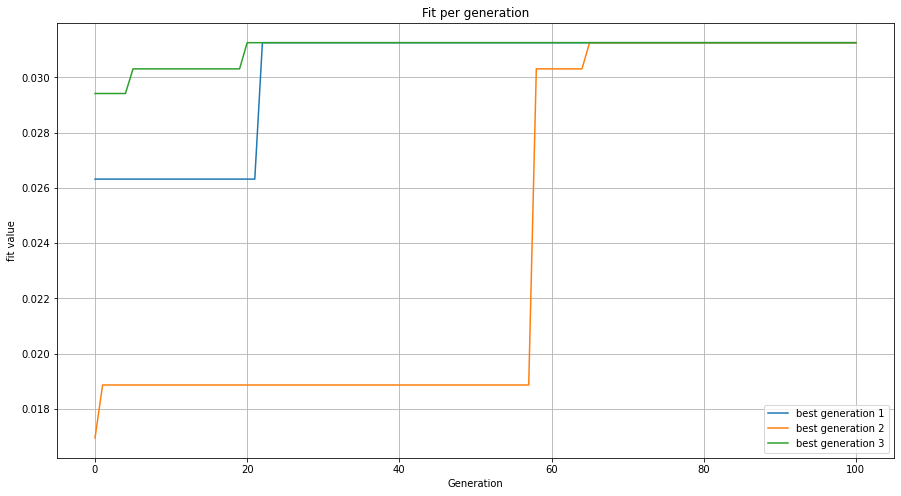

In [61]:
run_3_times(genetic_alg)

# Caso de TSP con 6 ciudades:

In [62]:
nodos = ['A', 'B', 'C', 'D', 'E', 'F']
grafo = np.array([[100, 12, 29, 22, 13, 24],
                  [12, 100, 19, 3, 25, 6],
                  [29, 19, 100, 21, 23, 28],
                  [22, 3, 21, 100, 4, 5],
                  [13, 25, 23, 4,  100, 16],
                  [24, 6, 28, 5, 16, 100]])

grafo= pd.DataFrame(grafo, nodos, nodos)
def fit_function(generation):
        return fit(generation, grafo)


In [63]:
genetic_alg = Ga_class.GA(100, 10, 6, 0.15, nodos, individual_factory, fit_function, selection='roulette', cross_over='ordered', mutation='swap',desired_fitness=0)

In [64]:
best_individual, mean_fit_per_generation, worst_fit_per_generation, best_fit_per_generation = genetic_alg.run()

working in generation 0
the best fit is: 0.0125
working in generation 1
the best fit is: 0.0125
working in generation 2
the best fit is: 0.0125
working in generation 3
the best fit is: 0.0125
working in generation 4
the best fit is: 0.0125
working in generation 5
the best fit is: 0.0125
working in generation 6
the best fit is: 0.0125
working in generation 7
the best fit is: 0.0125
working in generation 8
the best fit is: 0.0125
working in generation 9
the best fit is: 0.0125
working in generation 10
the best fit is: 0.0125
working in generation 11
the best fit is: 0.0125
working in generation 12
the best fit is: 0.0125
working in generation 13
the best fit is: 0.0125
working in generation 14
the best fit is: 0.0125
working in generation 15
the best fit is: 0.013157894736842105
working in generation 16
the best fit is: 0.013157894736842105
working in generation 17
the best fit is: 0.013157894736842105
working in generation 18
the best fit is: 0.013157894736842105
working in generation 1

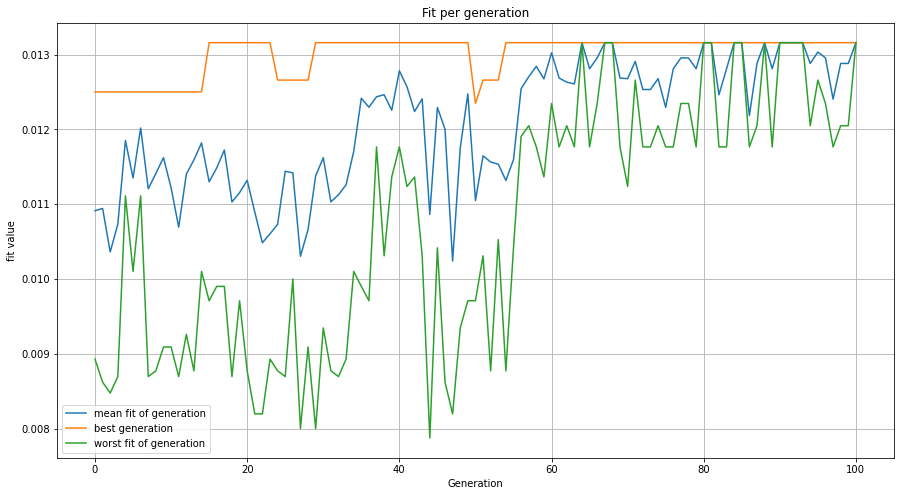

In [65]:
plot_fit_per_generation(best_fit_per_generation, mean_fit_per_generation, worst_fit_per_generation)

óptimo esperado: 76 FBCAED

In [66]:
theBest = best_individual.reshape((1,6))
print('fitness '+ str(theBest) + str(1/fit_function(theBest)))

fitness [['E' 'A' 'C' 'B' 'F' 'D']][[76.]]


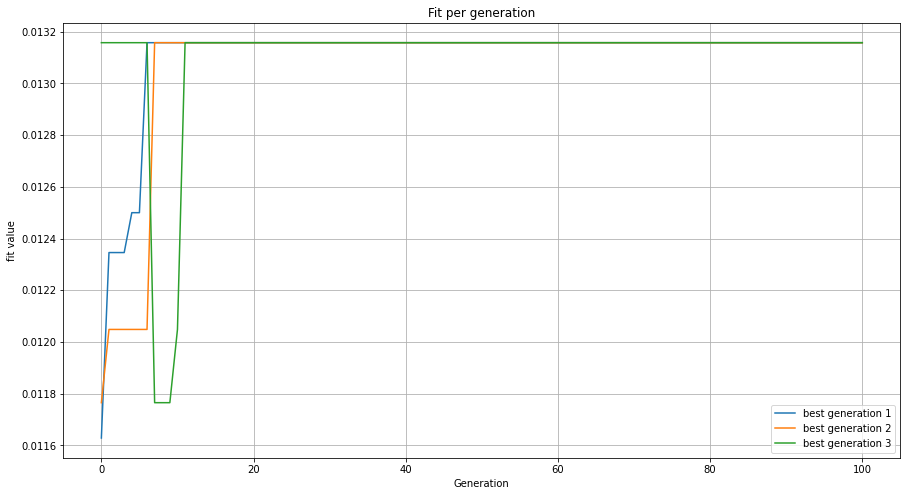

In [67]:
run_3_times(genetic_alg)